In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
#!/bin/bash
!kaggle datasets download mahmoudshaheen1134/lemon-leaf-disease-dataset-lldd

Dataset URL: https://www.kaggle.com/datasets/mahmoudshaheen1134/lemon-leaf-disease-dataset-lldd
License(s): CC0-1.0


In [3]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/lemon-leaf-disease-dataset-lldd.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

extract_path = '/content/Original Dataset'  # Set extract_path to the actual extracted directory
print(os.listdir(extract_path)) # See the contents of the extracted folder

['Bacterial Blight', 'Curl Virus', 'Healthy Leaf', 'Dry Leaf', 'Deficiency Leaf', 'Spider Mites', 'Anthracnose', 'Sooty Mould', 'Citrus Canker']


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

# Define dataset path
data_dir = "/content/Original Dataset/"

# Image parameters
img_size = (128, 128)
batch_size = 32

# Load dataset
train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Get class names before preprocessing
class_names = train_ds_raw.class_names
num_classes = len(class_names)

Found 1354 files belonging to 9 classes.
Using 1084 files for training.
Found 1354 files belonging to 9 classes.
Using 270 files for validation.


In [5]:
# Normalize pixel values
normalization_layer = layers.Rescaling(1./255)
train_ds_raw = train_ds_raw.map(lambda x, y: (normalization_layer(x), y))
val_ds_raw = val_ds_raw.map(lambda x, y: (normalization_layer(x), y))

In [6]:
# Define CNN model
model = keras.Sequential([
    layers.Input(shape=(128, 128, 3)),  # Explicit Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Using retrieved num_classes
])

In [7]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train model
epochs = 15
history = model.fit(train_ds_raw, validation_data=val_ds_raw, epochs=epochs)


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 346ms/step - accuracy: 0.1862 - loss: 2.2545 - val_accuracy: 0.3889 - val_loss: 1.6225
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.4451 - loss: 1.5530 - val_accuracy: 0.6889 - val_loss: 1.0365
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.6228 - loss: 1.1151 - val_accuracy: 0.7778 - val_loss: 0.7979
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.6598 - loss: 0.9932 - val_accuracy: 0.8185 - val_loss: 0.6663
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - accuracy: 0.7267 - loss: 0.7499 - val_accuracy: 0.8481 - val_loss: 0.5167
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.7745 - loss: 0.6646 - val_accuracy: 0.8037 - val_loss: 0.7053
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.7565 - loss: 0.6934 - val_accuracy: 0.8778 - val_loss: 0.4735
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.7795 - loss: 0.5842 - val_accurac

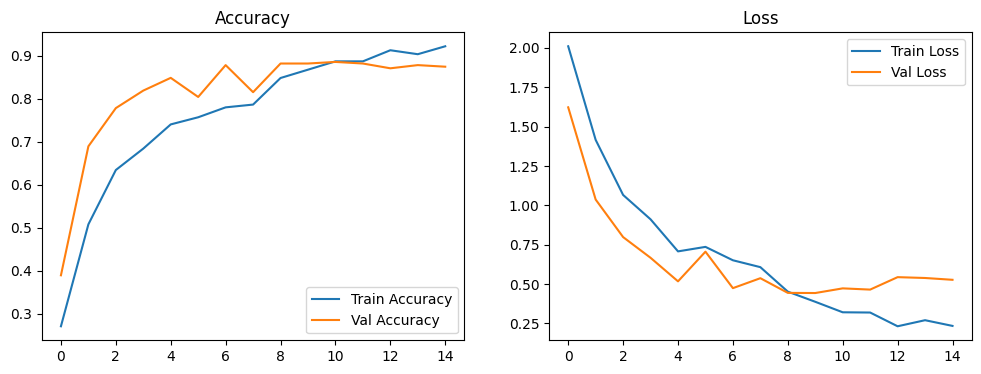

In [9]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


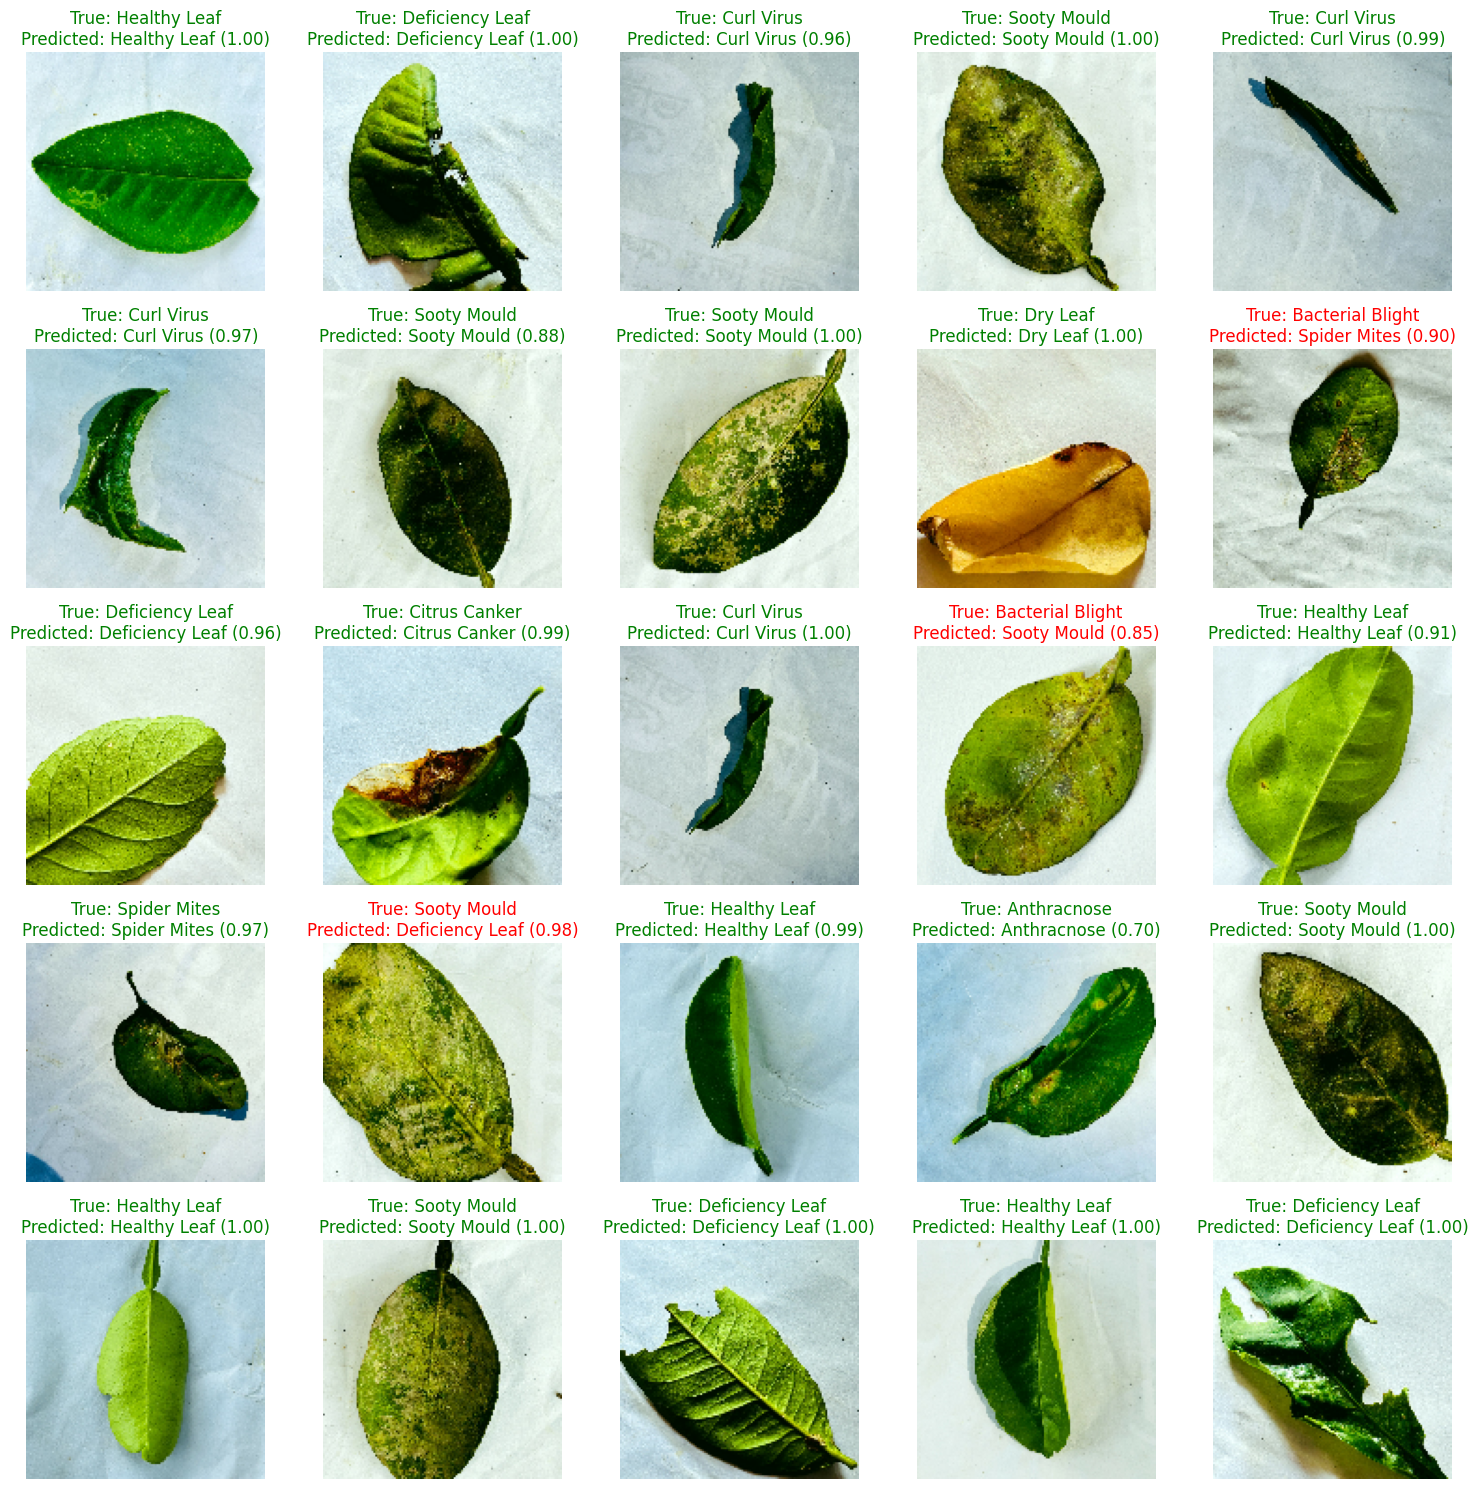

In [10]:
import numpy as np

# Get the first batch of images and labels from the validation dataset
image_batch, label_batch = next(iter(val_ds_raw))

# Make predictions on the batch (get probabilities)
predictions = model.predict(image_batch)

# Function to display images with their true label and predicted probabilities
def show_predictions_with_probabilities(images, true_labels, predictions, class_names):
    plt.figure(figsize=(15, 15))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_index = np.argmax(predictions[i])
        predicted_label = class_names[predicted_index]
        probability = predictions[i][predicted_index]
        title_color = "green" if true_label == predicted_label else "red"
        plt.title(f"True: {true_label}\nPredicted: {predicted_label} ({probability:.2f})", color=title_color)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Get the true labels for the batch
true_labels = label_batch.numpy()

# Show the predictions with probabilities
show_predictions_with_probabilities(image_batch.numpy(), true_labels, predictions, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.81      0.81      0.81        21
Bacterial Blight       0.79      0.65      0.71        17
   Citrus Canker       0.93      0.84      0.89        32
      Curl Virus       0.96      0.76      0.85        34
 Deficiency Leaf       0.83      0.93      0.88        43
        Dry Leaf       1.00      1.00      1.00        31
    Healthy Leaf       0.84      0.92      0.88        39
     Sooty Mould       0.86      0.94      0.90        34
    Spider Mites       0.80      0.84      0.82        19

        accuracy                           0.87   

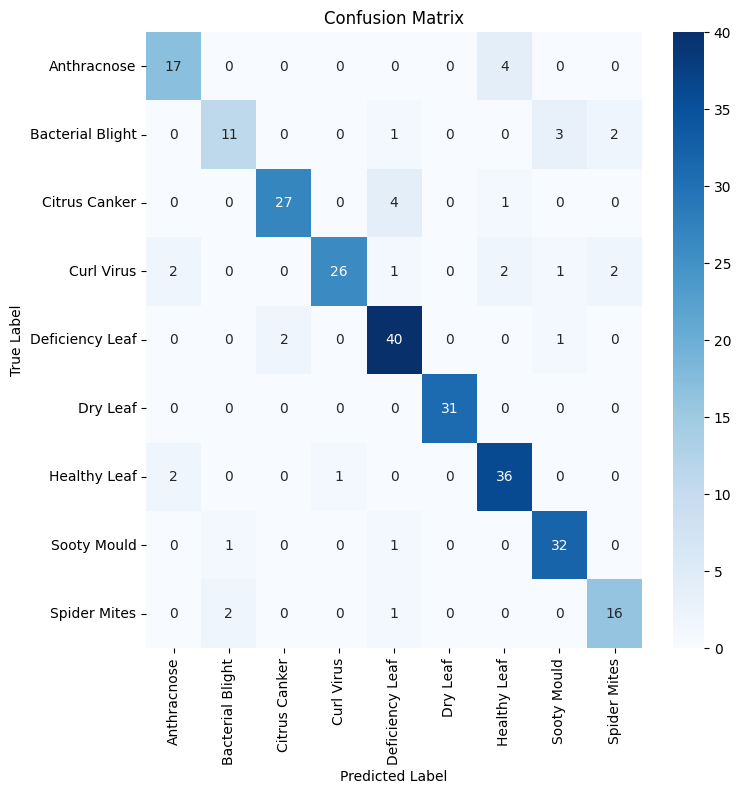

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Prepare to get all true labels and predictions from the validation set
all_true_labels = []
all_predicted_labels = []

# Iterate through the validation dataset to get all batches
for images, labels in val_ds_raw:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    all_true_labels.extend(labels.numpy())
    all_predicted_labels.extend(predicted_labels)

# Generate the classification report
report = classification_report(all_true_labels, all_predicted_labels, target_names=class_names)

print("Classification Report:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(all_true_labels, all_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()